In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
parkinsons = pd.read_csv('pd_speech_features.csv')
parkinsons.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
parkinsons.shape

(756, 755)

In [4]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
parkinsons.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [6]:
parkinsons.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [7]:
parkinsons.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [8]:
parkinsons.isnull().sum().sum()

0

In [9]:
# distribution of target variable
parkinsons['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [10]:
#grouping the data based on the target variable
parkinsons.groupby('class').mean()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
class,,,,,,,,,,,,,,,,,,,,,
0,139.421875,0.359375,0.767434,0.663866,0.430807,372.244792,371.031250,0.005699,0.000290,0.001405,...,47.053772,45.754404,32.006881,21.592319,14.797452,10.726868,9.021939,9.619535,9.326543,15.074830
1,120.760638,0.569149,0.739084,0.712856,0.508888,307.539007,306.218085,0.006585,0.000414,0.002637,...,12.165554,19.593113,19.719812,17.565102,13.556976,12.726897,13.516916,16.562531,16.598373,37.066227


<AxesSubplot:xlabel='PPE', ylabel='DFA'>

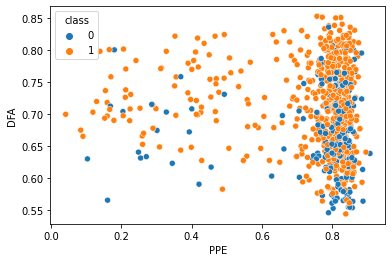

In [11]:
sns.scatterplot(x='PPE', y='DFA',hue='class', data=parkinsons)

In [12]:
#seperation of feature and target
updated_parkinson = parkinsons.drop(columns=['id','class'],axis=1)
targetAttribute = parkinsons['class']

In [13]:
print(updated_parkinson)

     gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0         1  0.85247  0.71826  0.57227        240               239   
1         1  0.76686  0.69481  0.53966        234               233   
2         1  0.85083  0.67604  0.58982        232               231   
3         0  0.41121  0.79672  0.59257        178               177   
4         0  0.32790  0.79782  0.53028        236               235   
..      ...      ...      ...      ...        ...               ...   
751       0  0.80903  0.56355  0.28385        417               416   
752       0  0.16084  0.56499  0.59194        415               413   
753       0  0.88389  0.72335  0.46815        381               380   
754       0  0.83782  0.74890  0.49823        340               339   
755       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  ...  \
0            0.008064            0.000087       0.00218      0.000018

In [14]:
#Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
optimisedAttributes = SelectKBest().fit(updated_parkinson, targetAttribute)

In [15]:
print(optimisedAttributes)

SelectKBest()


In [16]:
new_dataset = pd.DataFrame({'Attributes': list(updated_parkinson.columns), 'Scores':optimisedAttributes.scores_})
new_dataset = new_dataset.sort_values(by='Scores', ascending=False)
new_dataset

,Attributes,Scores
58,mean_MFCC_2nd_coef,142.506911
620,tqwt_minValue_dec_12,140.011407
584,tqwt_stdValue_dec_12,137.750103
656,tqwt_maxValue_dec_12,136.312113
583,tqwt_stdValue_dec_11,136.142253
...,...,...
350,tqwt_energy_dec_30,0.000607
685,tqwt_skewnessValue_dec_5,0.000462
343,tqwt_energy_dec_23,0.000161
339,tqwt_energy_dec_19,0.000089


In [17]:
optimisedAttributes = optimisedAttributes.transform(updated_parkinson)

In [18]:
Attributes = new_dataset.iloc[:50,0].values
Attributes

array(['mean_MFCC_2nd_coef', 'tqwt_minValue_dec_12',
       'tqwt_stdValue_dec_12', 'tqwt_maxValue_dec_12',
       'tqwt_stdValue_dec_11', 'tqwt_entropy_log_dec_12',
       'tqwt_maxValue_dec_11', 'tqwt_minValue_dec_11',
       'tqwt_minValue_dec_13', 'std_9th_delta_delta',
       'std_8th_delta_delta', 'tqwt_maxValue_dec_13',
       'std_7th_delta_delta', 'tqwt_stdValue_dec_13',
       'std_6th_delta_delta', 'tqwt_entropy_shannon_dec_11',
       'tqwt_kurtosisValue_dec_27', 'std_8th_delta',
       'tqwt_entropy_log_dec_11', 'tqwt_TKEO_std_dec_12',
       'tqwt_TKEO_std_dec_11', 'tqwt_entropy_log_dec_13',
       'tqwt_kurtosisValue_dec_26', 'std_10th_delta_delta',
       'std_9th_delta', 'std_11th_delta_delta',
       'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_16',
       'tqwt_entropy_shannon_dec_15', 'tqwt_entropy_shannon_dec_12',
       'tqwt_stdValue_dec_15', 'std_6th_delta', 'tqwt_energy_dec_12',
       'std_7th_delta', 'tqwt_stdValue_dec_14',
       'std_delta_delta

In [19]:
X = pd.DataFrame(updated_parkinson, columns = Attributes)

In [20]:
X.shape

(756, 50)

In [21]:
#SPLITING TRAINING AND TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(X, targetAttribute, test_size=0.3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",y_train.shape)
print("Y_test",y_test.shape)

X_train (529, 50)
X_test (227, 50)
Y_train (529,)
Y_test (227,)


In [22]:
#STANDARDINZING DATA
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train = scaler.transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [26]:



def LVQ(X_train, X_test, y_train, y_test, epoch, learn_rate):
    train_data = train_lvq(data= X_train, labels= y_train, num_epochs= int(epoch), learning_rate= learn_rate, validation_data= X_test, validation_labels= y_test)
    print(train_data)


def train_lvq(data, labels, num_epochs, learning_rate, validation_data=None, validation_labels=None):
    # Get unique class labels.
    num_dims = data.shape[1]
    labels = labels.astype(int)
    unique_labels = list(set(labels))

    num_protos = len(unique_labels)
    prototypes = np.empty((num_protos, num_dims))
    proto_labels = []

    # Initialize prototypes using class means.
    for i in unique_labels:
        class_data = data[labels == i, :]

        # Compute class mean.
        mean = np.mean(class_data, axis=0)

        prototypes[i] = mean
        proto_labels.append(i)

    # Loop through data set.
    for epoch in range(0, num_epochs):
        for fvec, lbl in zip(data, labels):
            # Compute distance from each prototype to this point
            distances = list(np.sum(np.subtract(fvec, p)**2) for p in prototypes)
            min_dist_index = distances.index(min(distances))

            # Determine winner prototype.
            winner = prototypes[min_dist_index]
            winner_label = proto_labels[min_dist_index]

            # Push or repel the prototype based on the label.
            if winner_label == lbl:
                sign = 1
            else:
                sign = -1

            # Update winner prototype
            prototypes[min_dist_index] = np.add(prototypes[min_dist_index], np.subtract(fvec, winner) * learning_rate * sign)

        # Use validation set to test performance.
        val_err = 0
        if validation_labels is not None:
            for fvec, lbl in zip(validation_data, validation_labels):
                distances = list(np.sum(np.subtract(fvec, p) ** 2) for p in prototypes)
                min_dist_index = distances.index(min(distances))

                # Determine winner prototype label
                winner_label = proto_labels[min_dist_index]

                # Check if labels match
                if not winner_label == lbl:
                    val_err = val_err + 1

            val_err = val_err / len(validation_labels)
            print("Epoch " + str(epoch) + ". Testing error: " + str(val_err))
        else:
            print("Epoch " + str(epoch))


    return (prototypes, proto_labels)

In [27]:
LVQ(X_train,X_test,y_train,y_test,20,0.05)

Epoch 0. Testing error: 0.2511013215859031
Epoch 1. Testing error: 0.24669603524229075
Epoch 2. Testing error: 0.24669603524229075
Epoch 3. Testing error: 0.24669603524229075
Epoch 4. Testing error: 0.24669603524229075
Epoch 5. Testing error: 0.24669603524229075
Epoch 6. Testing error: 0.24669603524229075
Epoch 7. Testing error: 0.24669603524229075
Epoch 8. Testing error: 0.24669603524229075
Epoch 9. Testing error: 0.24669603524229075
Epoch 10. Testing error: 0.24669603524229075
Epoch 11. Testing error: 0.24669603524229075
Epoch 12. Testing error: 0.24669603524229075
Epoch 13. Testing error: 0.24669603524229075
Epoch 14. Testing error: 0.24669603524229075
Epoch 15. Testing error: 0.24669603524229075
Epoch 16. Testing error: 0.24669603524229075
Epoch 17. Testing error: 0.24669603524229075
Epoch 18. Testing error: 0.24669603524229075
Epoch 19. Testing error: 0.24669603524229075
(array([[-1.54860351, -1.70749517,  1.44245777,  1.58095431,  1.89876128,
         1.1741941 ,  1.63970904, -1.